<div id="img1-container">
    <img id="img1" src="images/apartment-building.jpg" alt="Description of the image" />
</div>


In [1]:
from IPython.display import HTML, Image, display

html = """

<div id="title-container">
<h1>Ancient Heights Apartments</h1>
</div>

<div id="meta-data-container">
<div>February 5, 2026</div>
<div>by Aaron Hardy</div>
</div>
<div id="title-bar"></div>
"""

display(HTML(html))

## Summary

Ancient heights is a hypothetical existing apartment property located in the city of Knoxville, Tennesee. This analysis will demonstrate one way to analyze an apartment commerial real estate investment. The analysis covers cash flows, financing, valuation, and risk. The economic outlook of Knoxville, Tennesee plays a large role in determining the risk and future cash flows of the property.

Going into Q1 2026, the Knoxville area economic and housing market trends indicated moderate tailwinds making apartment properties relatively attractive for sellers.


In [2]:
# from IPython.display import HTML, display

html = """

<div class="note"> 
    <div class="note-title">Note:</div>
    <div class="note-body">
    Knox County, TN is a county includes the city of Knoxville as the main city and various surrounding cities and areas.
    </div>
</div>
"""

display(HTML(html))

In [ ]:
# from IPython.display import HTML

HTML(
    """
    <link rel="stylesheet" href="custom.css">
    <script src="custom.js" defer></script>
    <style>
    .jp-Notebook-cell.celltag_remove_cell {
        display: none !important;
    }
    </style>
    """
)

In [1]:
%load_ext autoreload 
%autoreload 2

from dotenv import load_dotenv
import os
from fredapi import Fred
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import dataframe_image as dfi
import sys
import import_ipynb


if ".." not in sys.path:
    sys.path.append("..")  # Add parent directory to path

from utils.line_plots import plot_line
from utils.bar_plots import plot_bars
from utils.tables import export_table

# sns.set_theme(style="ticks")

load_dotenv()

True

In [5]:
# df.reset_index(names="Date", inplace=True)
# df.to_csv("data/fred-data.csv", index=False)


# fetch_data()
def fetch_data(data_dict):
    series_list = []

    for name, series_id in data_dict.items():
        s = fred.get_series(series_id)
        s.name = name
        series_list.append(s)

    df = pd.concat(series_list, axis=1)
    df.reset_index(names="Date", inplace=True)
    df.to_csv("data/fred-data.csv", index=False)

    return df


fred = Fred(api_key=os.getenv("FRED_API_KEY"))

series_ids = {
    "knox_county_pop": "TNKNOX5POP",
    "us_pop": "POPTHM",
    "knox_county_trans_ind": "ATNHPIUS47093A",
    "us_trans_ind": "USSTHPI",
    "knox_county_gdp": "REALGDPALL47093",
    "us_gdp": "GDPC1",
    "median_list_price_knox_county": "MEDLISPRI47093",
    "median_list_price_us": "MEDLISPRIUS",
}

# df = fetch_data(data_dict=series_ids)

In [2]:
df = pd.read_csv("data/fred-data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
# Round dates: "2025-01-01" => "2024Q4" => "2024-12-31"
df.index = pd.to_datetime(df.index)
df.index = df.index.to_period("Q").to_timestamp("Q")
df = df.groupby(df.index).last()

# print(pop.resample("Q").last().dropna())


def inspect_data(df, var):
    df.loc[:, var]


# print(df.loc[:, ["knox_gdp", "us_gdp"]].dropna(how="all").tail())

# df["knox_gdp_ttm"] = df["knox_gdp"].rolling(4).sum()
# df["us_gdp_ttm"] = df["us_gdp"].rolling(4).sum()
# print(df.tail())

# long = df.melt(ignore_index=False)
# long = long.sort_values(["variable"])

# long["pct_chg"] = long.groupby("variable")["value"].pct_change(
#     periods=1, fill_method=None
# )
# # Convert to wide format for plotting
# wide = long.pivot_table(
#     index=long.index, columns="variable", values="pct_chg"
# ).dropna()


# data = df.melt(id_vars="Date")

# df_pct = df.loc[:, "knox_trans_ind"].pct_change()


# long = plot_data.melt(ignore_index=False)
#     long = long.sort_values(["variable", long.index.name])

#     long["pct_chg"] = long.groupby("variable")["value"].pct_change(
#         periods=period_shift, fill_method=None
#     )

#     # Convert to wide format for plotting
#     wide = long.pivot_table(
#         index=long.index, columns="variable", values="pct_chg"
#     ).dropna(how="all")

## Property Overview

- Location: 123 Elm Street, Knoxville, Tennessee, USA
- Type: Multi-family Apartment Complex
- Rental Units: 90
- Average rent per unit: $1,900/month (a/o December 2025)
- Occupancy rate: 95%


## Property Location

Ancient Heights Apartments is located in Knoxville, a city in eastern Tennessee known for its growing population, property values, and employment. The city has a diverse economy, with major contributions from education, healthcare, manufacturing, energy research, and tourism supporting steady growth and regional stability.


In [7]:
# def plot_bar_pct(
#     df=df,
#     # start="2020",
#     # end=None,
#     # cols=None,
#     title="",
#     subtitle="",
#     footnote="",
#     legend_labels=None,
#     file_name=None,
#     show=False,
#     period_shift=1,
# ):

#     import matplotlib.pyplot as plt
#     import pandas as pd

#     # if cols is None:
#     #     cols = df.columns

#     # if end is not None:
#     #     plot_data = df.loc[:, cols].copy()
#     #     plot_data = plot_data.loc[start:end, :].copy()
#     # else:
#     #     plot_data = df.loc[:, cols].copy()
#     #     plot_data = plot_data.loc[start:, :].copy()

#     # long = plot_data.melt(ignore_index=False)
#     # long = long.sort_values(["variable", "index"])
#     # long["pct_chg"] = long.groupby("variable")["value"].pct_change(
#     #     periods=period_shift, fill_method=None
#     # )
#     # long = long.dropna().copy()

#     # long = plot_data.melt(ignore_index=False)
#     # long = long.sort_values(["variable"])

#     # long["pct_chg"] = long.groupby("variable")["value"].pct_change(
#     #     periods=period_shift, fill_method=None
#     # )

#     # # Convert to wide format for plotting
#     # wide = long.pivot_table(
#     #     index=long.index, columns="variable", values="pct_chg"
#     # ).dropna()

#     fig, ax = plt.subplots(figsize=(10, 4))
#     ax.xaxis.set_major_locator(mdates.YearLocator())
#     ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
#     ax.set_position([0.08, 0.20, 0.90, 0.65])
#     ax.set_ymargin(0.3)
#     # fig.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.2)
#     # fig.set_size_inches(11, 5)  # increases canvas, not plot density

#     # Plot grouped bars
#     bars = df.plot(kind="bar", ax=ax, width=0.8)

#     # Format y-axis as percent
#     ax.yaxis.set_major_formatter(lambda x, _: f"{x:.1%}")

#     # X-axis labels
#     ax.set_xticklabels(df.index.strftime("%Y-%m-%d"), rotation=0, ha="center")

#     # Labels
#     ax.set_xlabel("")
#     ax.set_ylabel("")
#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)

#     handles, labels = ax.get_legend_handles_labels()

#     # Replace labels
#     new_labels = legend_labels

#     ax.legend(handles, new_labels)

#     for container in bars.containers:
#         ax.bar_label(
#             container, labels=[f"{v*100:.1f}%" for v in container.datavalues], padding=3
#         )

#     # plt.tight_layout(pad=1)
#     # plt.show()
#     # Title
#     fig.text(0.01, 1.05, title, fontsize=18, fontweight="bold", ha="left")

#     # Subtitle
#     fig.text(0.01, 0.99, subtitle, fontsize=14, ha="left", color="gray")

#     # Footnote
#     fig.text(0.09, -0.12, footnote, fontsize=12, ha="left", color="gray")

#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)

#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
#     plt.tight_layout(pad=1.2)

#     fig.savefig(f"plots/{file_name}.png", bbox_inches="tight", pad_inches=0.4, dpi=300)

#     if show is True:
#         plt.show()
#     else:
#         plt.close(fig)

In [ ]:
df_pop = df.loc["2018":, ["knox_county_pop", "us_pop"]].dropna()
# print(df_pop)
df_table = df_pop.rename(
    columns={"knox_county_pop": "Knox County, TN", "us_pop": "U.S."}
)

pop_growth = df_table.melt(ignore_index=False)
pop_growth["pct_chg"] = pop_growth.groupby("variable")["value"].pct_change()
pop_growth.dropna(inplace=True)
pop_growth = pop_growth.loc[:, ["variable", "pct_chg"]]
# pop_growth.filter([p])
# print(pop_growth)
pop_growth = pop_growth.pivot(columns="variable", values="pct_chg")

export_table(
    df=pop_growth * 100,
    file_name="pop",
    caption="Population Growth",
    col_format={
        "Knox County, TN": lambda x: "{:.1f}%".format(x * 100),
        "U.S.": lambda x: "{:.1f}%".format(x * 100),
    },
    show=True,
)

variable,"Knox County, TN",U.S.
Date,,
2019-03-31,0.718%,0.536%
2020-03-31,2.211%,0.512%
2021-03-31,1.139%,0.123%
2022-03-31,2.032%,0.463%
2023-03-31,1.148%,0.786%
2024-03-31,1.031%,0.936%


In [ ]:
# test = pd.DataFrame({"A": [1, 2], "B": [3, 4]}).style
# (
#     df.style
#       .format("{:,.2f}")
#       .set_caption("Economic Indicators")
#       .set_table_styles([
#           {"selector": "caption",
#            "props": [("font-size", "16px"),
#                      ("font-weight", "bold"),
#                      ("text-align", "left")]},
#           {"selector": "th",
#            "props": [("text-align", "center"),
#                      ("font-weight", "bold")]},
#       ])
# )

# (
#     df.style
#       .format({
#           "GDP": "{:,.0f}",
#           "GDP YoY": "{:.1%}",
#           "Population": "{:,.0f}",
#           "Pop YoY": "{:.2%}",
#       })
#       .background_gradient(cmap="Blues", subset=["GDP"])
#       .background_gradient(cmap="RdYlGn", subset=["GDP YoY", "Pop YoY"])
#       .set_caption("Macroeconomic Summary")
# )

# (
#     df.style
#       .set_properties(subset=df.columns, **{"text-align": "right"})
#       .set_properties(subset=df.index, **{"text-align": "left"})
# )

# (
#     df.style
#       .apply(lambda x: ["background-color: #f5f5f5"]*len(x),
#              subset=pd.IndexSlice[[df.index[-1]], :])
# )

# df.style.format("{:.1%}").to_html("table.html")

# df_pop["knox_pop_prc_chg"] = df_pop["knox_pop"].pct_change()
# df_pop["us_pop_prc_chg"] = df_pop["us_pop"].pct_change()
# print(df_pop.tail())
long = df_pop.melt(ignore_index=False)


long["pct_chg"] = long.groupby("variable")["value"].pct_change(
    periods=1, fill_method=None
)
# print(long.tail(100))

# Convert to wide format for plotting
wide = long.pivot_table(index=long.index, columns="variable", values="pct_chg")
wide.dropna(inplace=True)
print(wide)

plot_bars(
    # plot_bar_pct(
    df=wide,
    y=["knox_county_pop", "us_pop"],
    footnote="FRED (KNXPOP, POPTHM)",
    title="Population Growth in Knox County, TN",
    subtitle="Y/Y % Change",
    legend_labels=["Knox County, TN", "U.S."],
    file_name="pop_growth",
    # period_shift=1,
    show=True,
)

variable    knox_gdp_ttm  us_gdp_ttm
Date                                
2021-03-31      0.088594   -0.019597
2022-03-31      0.041370    0.067099
2023-03-31      0.020472    0.021044


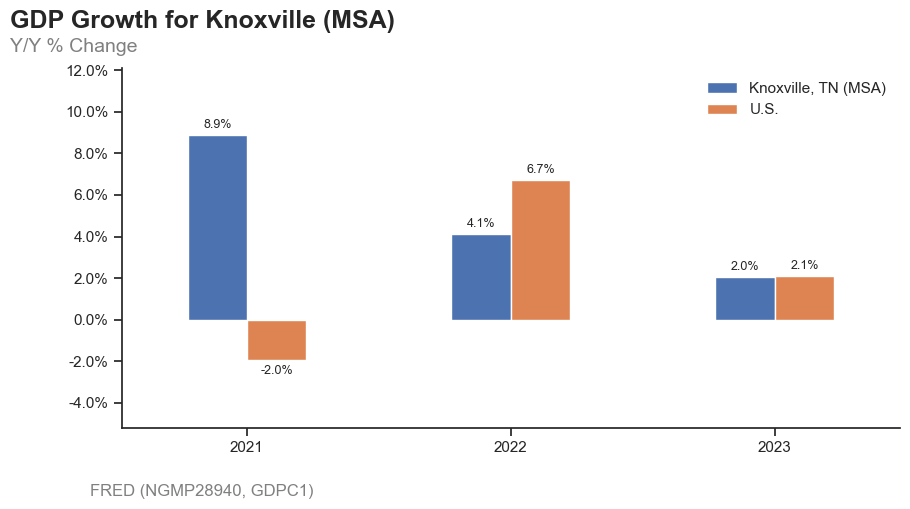

In [ ]:
df_gdp = df.loc[:, ["knox_gdp", "us_gdp"]].copy()

df_gdp["us_gdp_qrt"] = df_gdp["us_gdp"].div(
    4
)  # us_gdp (GDPC1) is seasonally adjusted annual (quarterly x 4)
df_gdp["knox_gdp_ttm"] = df_gdp["knox_gdp"]  # not seasonally adjusted (TTM)
df_gdp["us_gdp_ttm"] = df_gdp["us_gdp_qrt"].rolling(4).sum()
# print(df_gdp.tail(20))
df_gdp = df_gdp.loc["2020":, ["knox_gdp_ttm", "us_gdp_ttm"]]
# print(df_gdp.tail(20))

long = df_gdp.melt(ignore_index=False)

long["pct_chg"] = long.groupby("variable")["value"].pct_change(
    periods=4, fill_method=None
)
# print(long.tail(10))

# Convert to wide format for plotting
wide = long.pivot_table(index=long.index, columns="variable", values="pct_chg")
wide.dropna(inplace=True)
print(wide)
# print(wide.index)


# import importlib
# import utils.bar_plots

# importlib.reload(utils.bar_plots)

from utils.bar_plots import bar_plot

bar_plot(
    df=wide,
    y=["knox_gdp_ttm", "us_gdp_ttm"],
    footnote="FRED (REALGDPALL47093, GDPC1)",
    title="GDP Growth for Knoxville (MSA)",
    subtitle="Y/Y % Change",
    legend_labels=["Knox County, TN", "U.S."],
    file_name="gdp",
    show=True,
    # period_shift=4,
)

In [ ]:
df_list = df.loc[:, ["median_list_price_knox", "median_list_price_us"]].copy()

df_list["knox_avg_list_ttm"] = df_list["median_list_price_knox"].rolling(4).mean()
df_list["us_avg_list_ttm"] = df_list["median_list_price_us"].rolling(4).mean()
df_list = df_list.loc["2020":, ["knox_avg_list_ttm", "us_avg_list_ttm"]]

long = df_list.melt(ignore_index=False)
long["pct_chg"] = long.groupby("variable")["value"].pct_change(
    periods=4, fill_method=None
)

wide = long.pivot_table(index=long.index, columns="variable", values="pct_chg")
wide.dropna(inplace=True)
wide = wide[(wide.index.month == 12) & (wide.index.day == 31)]

plot_bar_pct(
    df=wide,
    footnote="FRED (MEDLISPRI28940, MEDLISPRIUS)",
    title="Median Home Listing Price",
    subtitle="Home listing  average price growth over prior year",
    legend_labels=["Knoxville, TN (MSA)", "U.S."],
    file_name="listing_price",
    # show=True,
    period_shift=4,
)

## Demographics


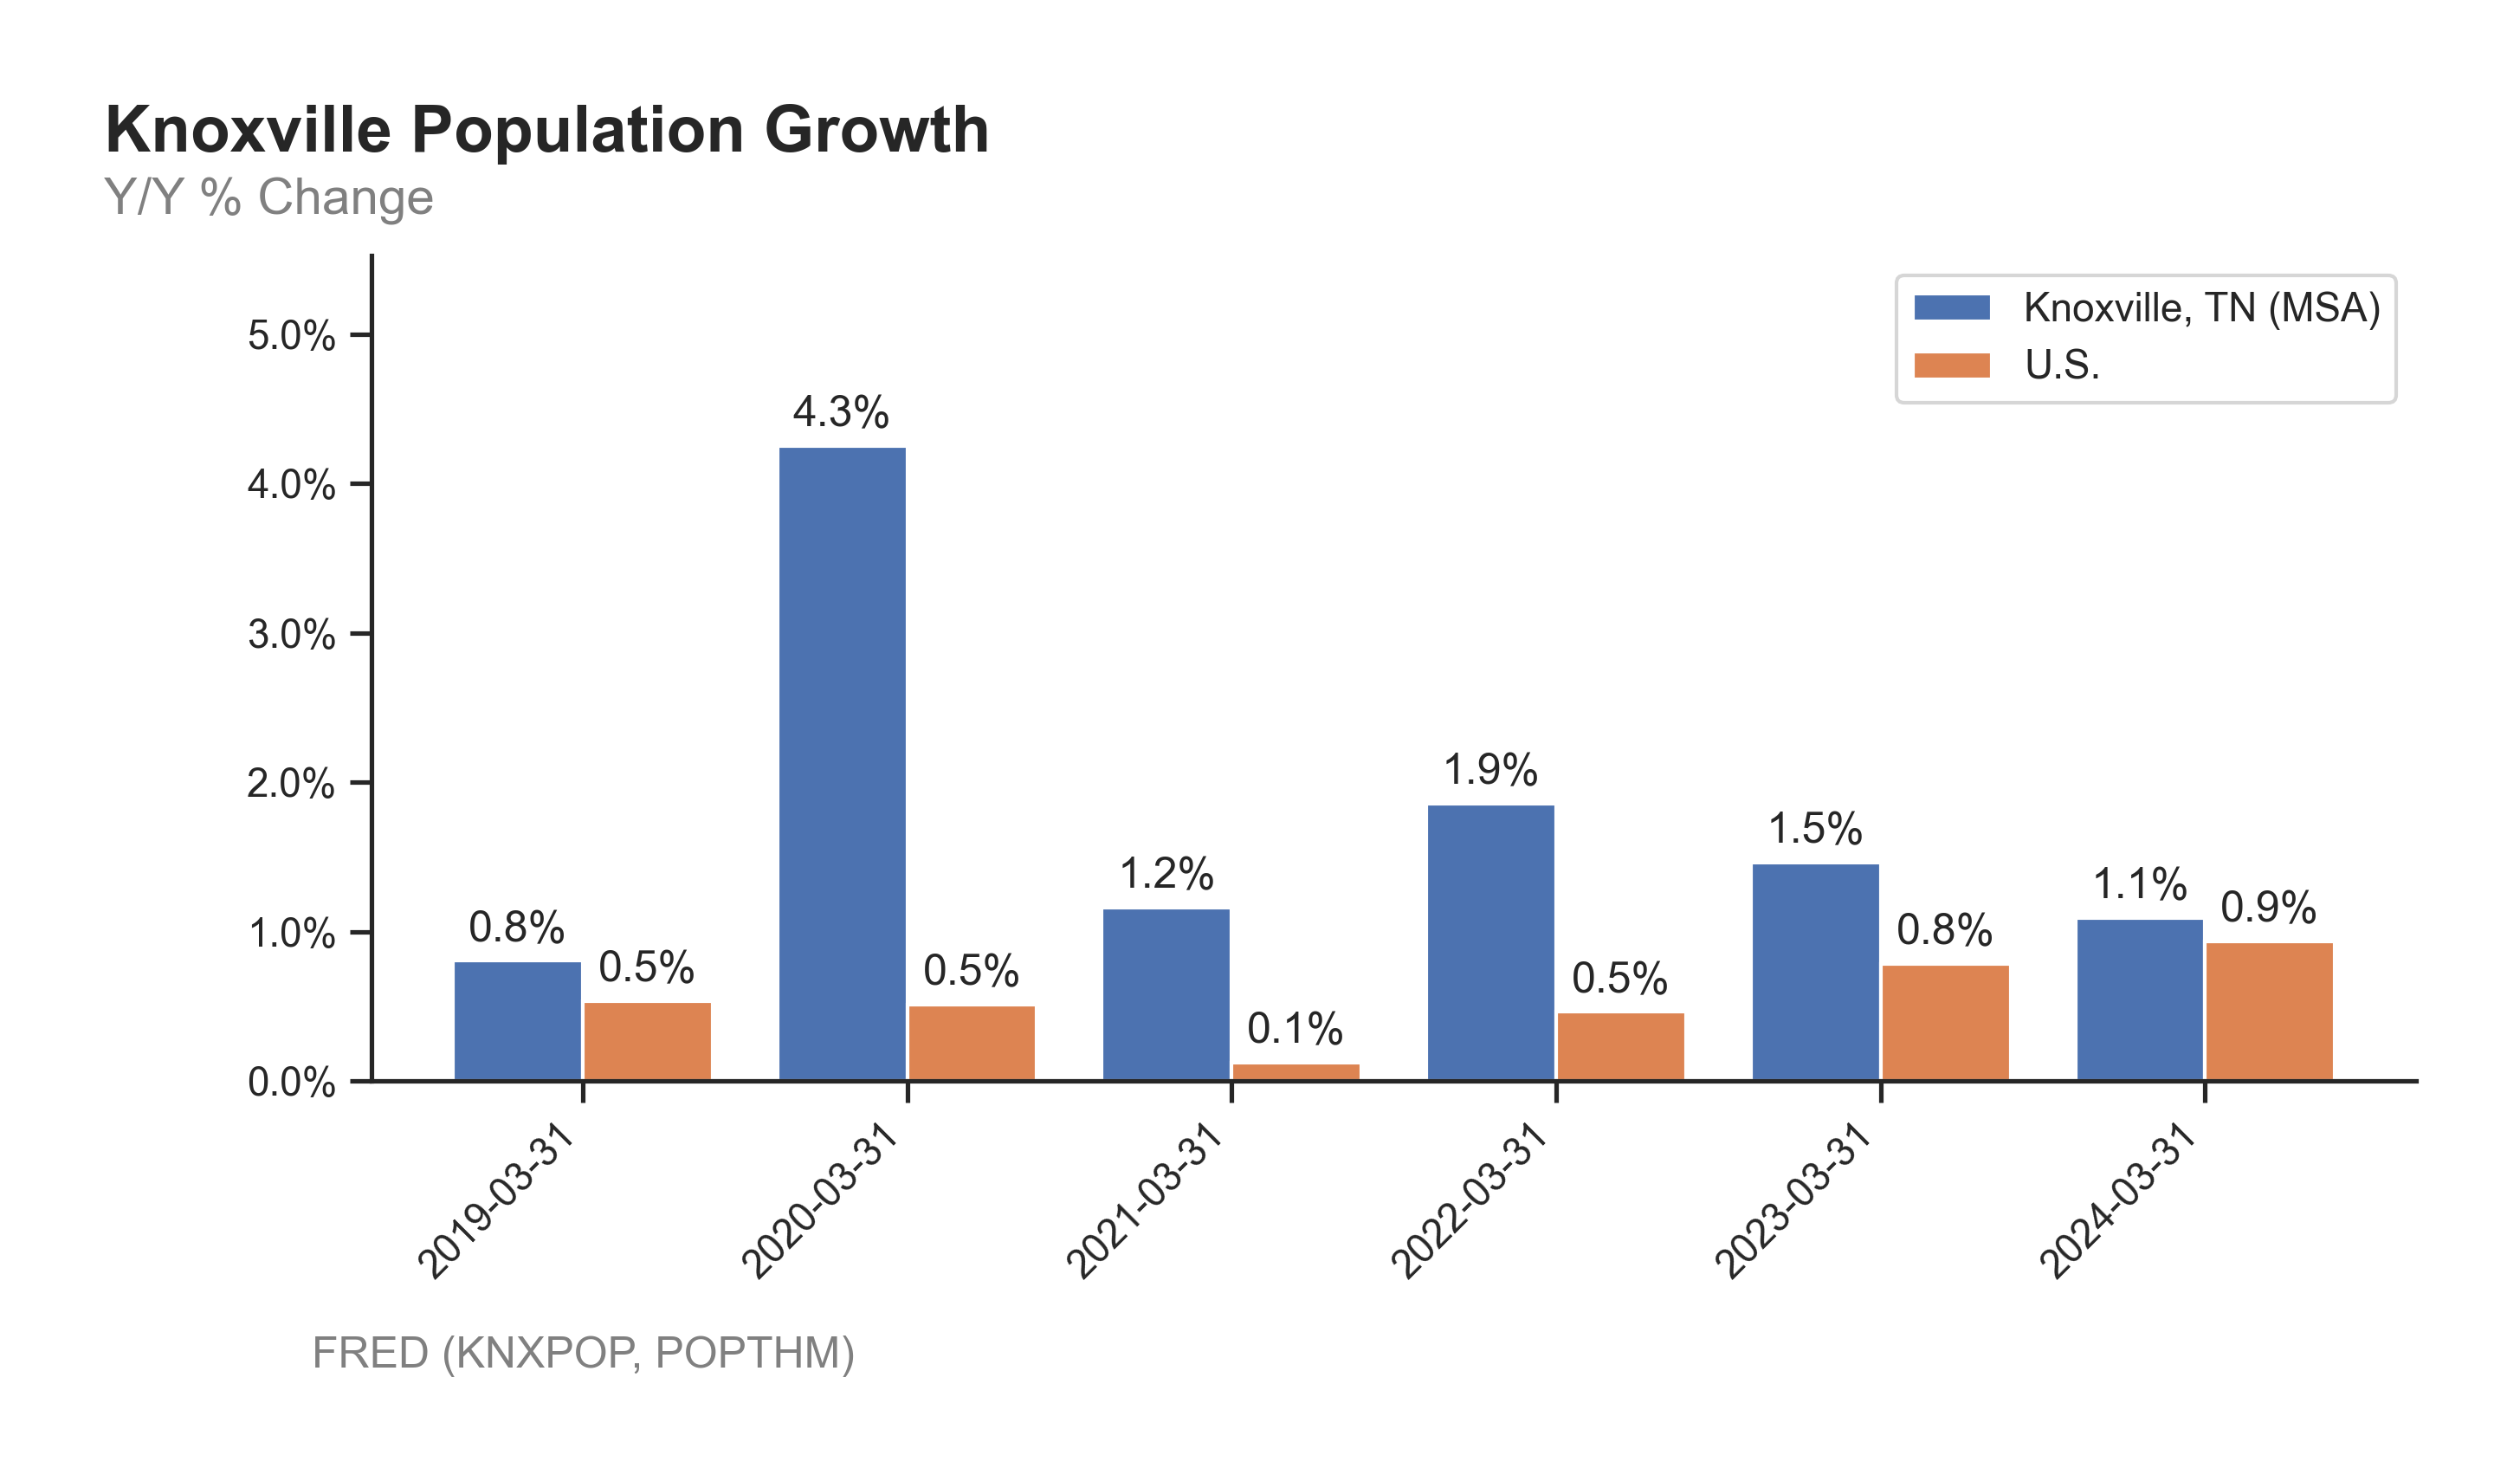

In [ ]:
from IPython.display import Image, display

display(Image(filename="plots/pop_growth.png"))

The population of Knoxville, Tennessee grew at a higher rate than the national growth rate for each of the four years ending January 1, 2024.

## State of the Economy

### GDP


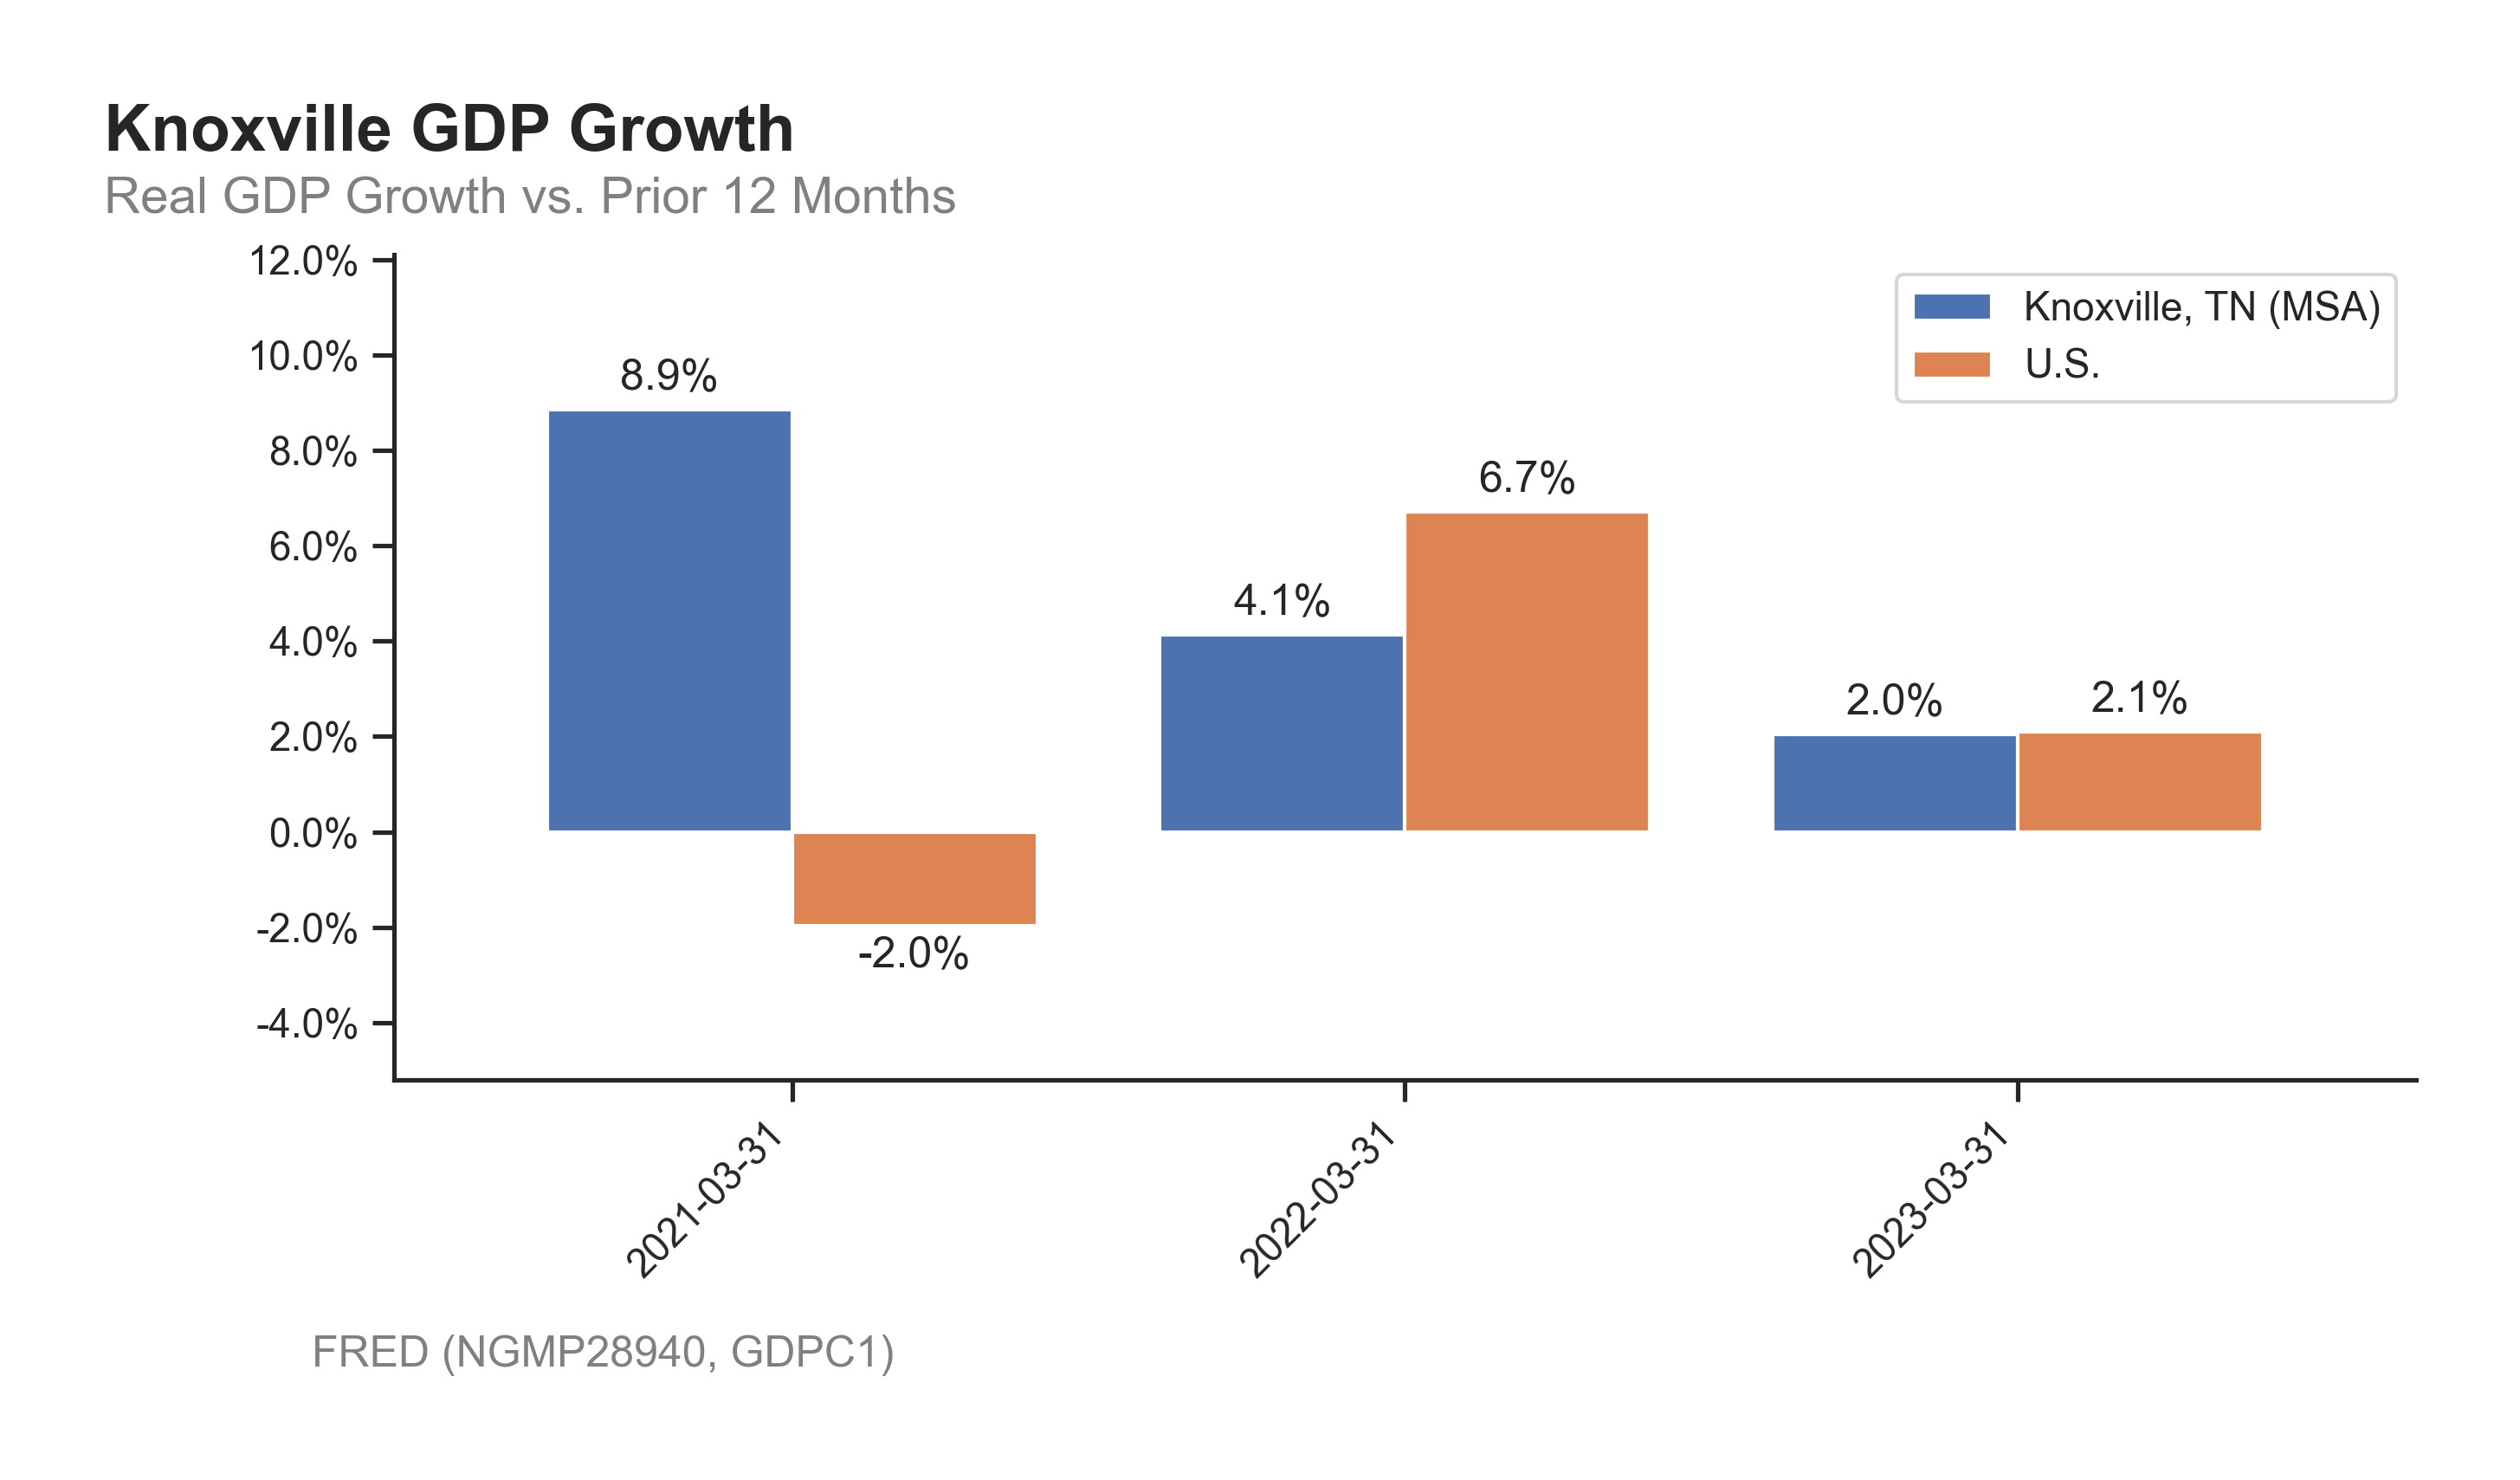

In [ ]:
from IPython.display import Image, display

display(Image(filename="plots/gdp.png"))

### Employment

Growth in employment is another factor that can drive demand for apartment housing. As employment grows new residents often choose apartments over single-family homes.


In [ ]:
from IPython.display import HTML, display

html = """
<div class="panel-container">
    <div class="panel">
        <div class="panel-title">Total Employment<sup>2</sup></div>
        <div class="panel-date"> (Sep. 2025, TTM growth)</div>
        <div class="panel-group-container">
            <div class="panel-group">
                <div class="panel-subtitle panel-group-subtitle">Knoxville, TN</div>
                <div class="panel-value panel-group-value">+1.1%</div>
            </div>
        </div>
    </div>
    <div class="panel">
        <div class="panel-title">Unemployment<sup>2</sup></div>
        <div class="panel-date"> (Sep. 2025, TTM growth)</div>
        <div class="panel-group-container">
            <div class="panel-group subpanel-green">
                <div class="panel-subtitle panel-group-subtitle">Knoxville, TN</div>
                <div class="panel-value panel-group-value">3.2%</div>
                <div class="">(-0.1 ppt)</div>
            </div>
            <div class="panel-group subpanel-red">
                <div class="panel-subtitle panel-group-subtitle">U.S.</div>
                <div class="panel-value panel-group-value">4.3%</div>
                <div class="">(+0.4 ppt)</div>
            </div>
        </div>
    </div>
</div>
"""

display(HTML(html))

Unemployment in Knoxville Metro edged lower while the national unemployment rate increased, indicating an improving employment environment in Knoxville compared to the average state nationally. Employment growth was driven mostly by gains in education, health care and government jobs.

### Wages

The average hourly wage was 15% lower in Knoxville compared to the national average. Average househould expenditures were 12% lower in Knoxville compared to the national average. This suggests households earn lower discretionary income than the average household nationwide. With wage and salary growth in the East South Central Region growing faster than the national average, household discretionary spending of Knoxville residents likely grew relative to the average household in the U.S.


In [ ]:
from IPython.display import HTML, display

html = """
<div class="panel-container">
    <div class="panel">
        <div class="panel-title">Average hourly wage<sup>2</sup></div>
        <div class="panel-date"> (May 2024)</div>
        <div class="panel-group-container">
            <div class="panel-group">
                <div class="panel-subtitle panel-group-subtitle">Knoxville, TN</div>
                <div class="panel-value panel-group-value">$27.68</div>
            </div>
            <div class="panel-group">
                <div class="panel-subtitle panel-group-subtitle">U.S.</div>
                <div class="panel-value panel-group-value">$32.66</div>
            </div>
        </div>
    </div>
    <div class="panel">
        <div class="panel-title">Annual household expenditures<sup>2</sup></div>
        <div class="panel-date">(2023)</div>
        <div class="panel-group-container">
            <div class="panel-group">
                <div class="panel-subtitle panel-group-subtitle">Knoxville, TN</div>
                <div class="panel-value panel-group-value">$68,364</div>
            </div>
            <div class="panel-group">
                <div class="panel-subtitle panel-group-subtitle">U.S.</div>
                <div class="panel-value panel-group-value">$77,280</div>
            </div>
        </div>
    </div>
    <div class="panel">
        <div class="panel-title">Wage and salary growth<sup>2</sup></div>
        <div class="panel-date"> (Sep. 2025, TTM growth)</div>
        <div class="panel-group-container">
            <div class="panel-group subpanel-green">
                <div class="panel-subtitle panel-group-subtitle">East South Central Region</div>
                <div class="panel-value panel-group-value">+4.3%</div>
            </div>
            <div class="panel-group subpanel-green">
                <div class="panel-subtitle panel-group-subtitle">U.S.</div>
                <div class="panel-value panel-group-value">+3.6%</div>
            </div>
        </div>
    </div>
</div>
"""

display(HTML(html))

### Housing


NameError: name 'mdates' is not defined

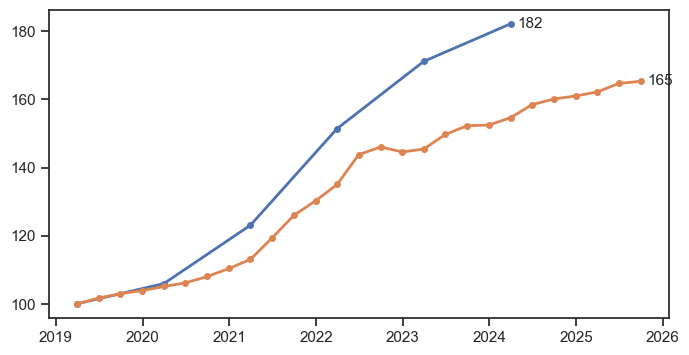

In [ ]:
# Years
LOOKBACK_YEARS = 5
last_index_date = df_trans_ind.dropna().index.max()
first_index_date = last_index_date - pd.DateOffset(years=LOOKBACK_YEARS)
# print(first_index_date)
df_trans_ind = df.loc[first_index_date:, ["knox_county_trans_ind", "us_trans_ind"]]


last_index_month = df_trans_ind.dropna().index.max().month
# .asfreq("QE")

# df_trans_ind = df_trans_ind.loc[
#     df_trans_ind.index.month.isin([3, 6, 9, 12])
# ]

# df_trans_ind = df_trans_ind.loc[df_trans_ind.index.month.isin(month_mask), :]

long = df_trans_ind.melt(ignore_index=False)
# period_chg = 1
# long["pct_chg"] = long.groupby("variable")["value"].pct_change(
#     periods=period_chg, fill_method=None
# )

long["Rebased Index"] = long.groupby("variable")["value"].transform(
    lambda x: x / x.iloc[0] * 100
)

long.dropna(inplace=True)

long["variable"] = long["variable"].replace(
    {
        "knox_county_trans_ind": "Knox County Home Price Index",
        "us_trans_ind": "US Home Price Index",
    }
)
# wide = long.pivot_table(index=long.index, columns="variable", values="pct_chg")

first_index = long.index[0]

plot_line(
    df=long,
    y_col="Rebased Index",
    title="5-Year Home Price Growth (Knox County vs. U.S.)",
    subtitle=f"Original indexes rebased to 100 at {first_index.strftime('%b %d, %Y')}",
    xlabel=None,
    ylabel="Index (Base = 100)",
    xdate_format="%b %Y",
    footnote="Source: FRED (ATNHPIUS28940Q, USSTHPI)",
    file_name="housing-price-index-rebased",
    # show=True,
)


# plot_bar_pct(
#     df=wide,
#     src="FRED (ATNHPIUS28940Q, USSTHPI)",
#     title="House Price Index",
#     subtitle="% Growth over prior six months",
#     legend_labels=["Knoxville, TN (MSA)", "U.S."],
#     file_name="housing-price-index",
#     # show=True,
# )

The Knoxville Metropolitan area experienced significant home price growth over the 5-year period ending September 30, 2025. Home price growth consistently outpaced U.S. average growth over the period as seen in the 5-Year Home Price Growth chart below.


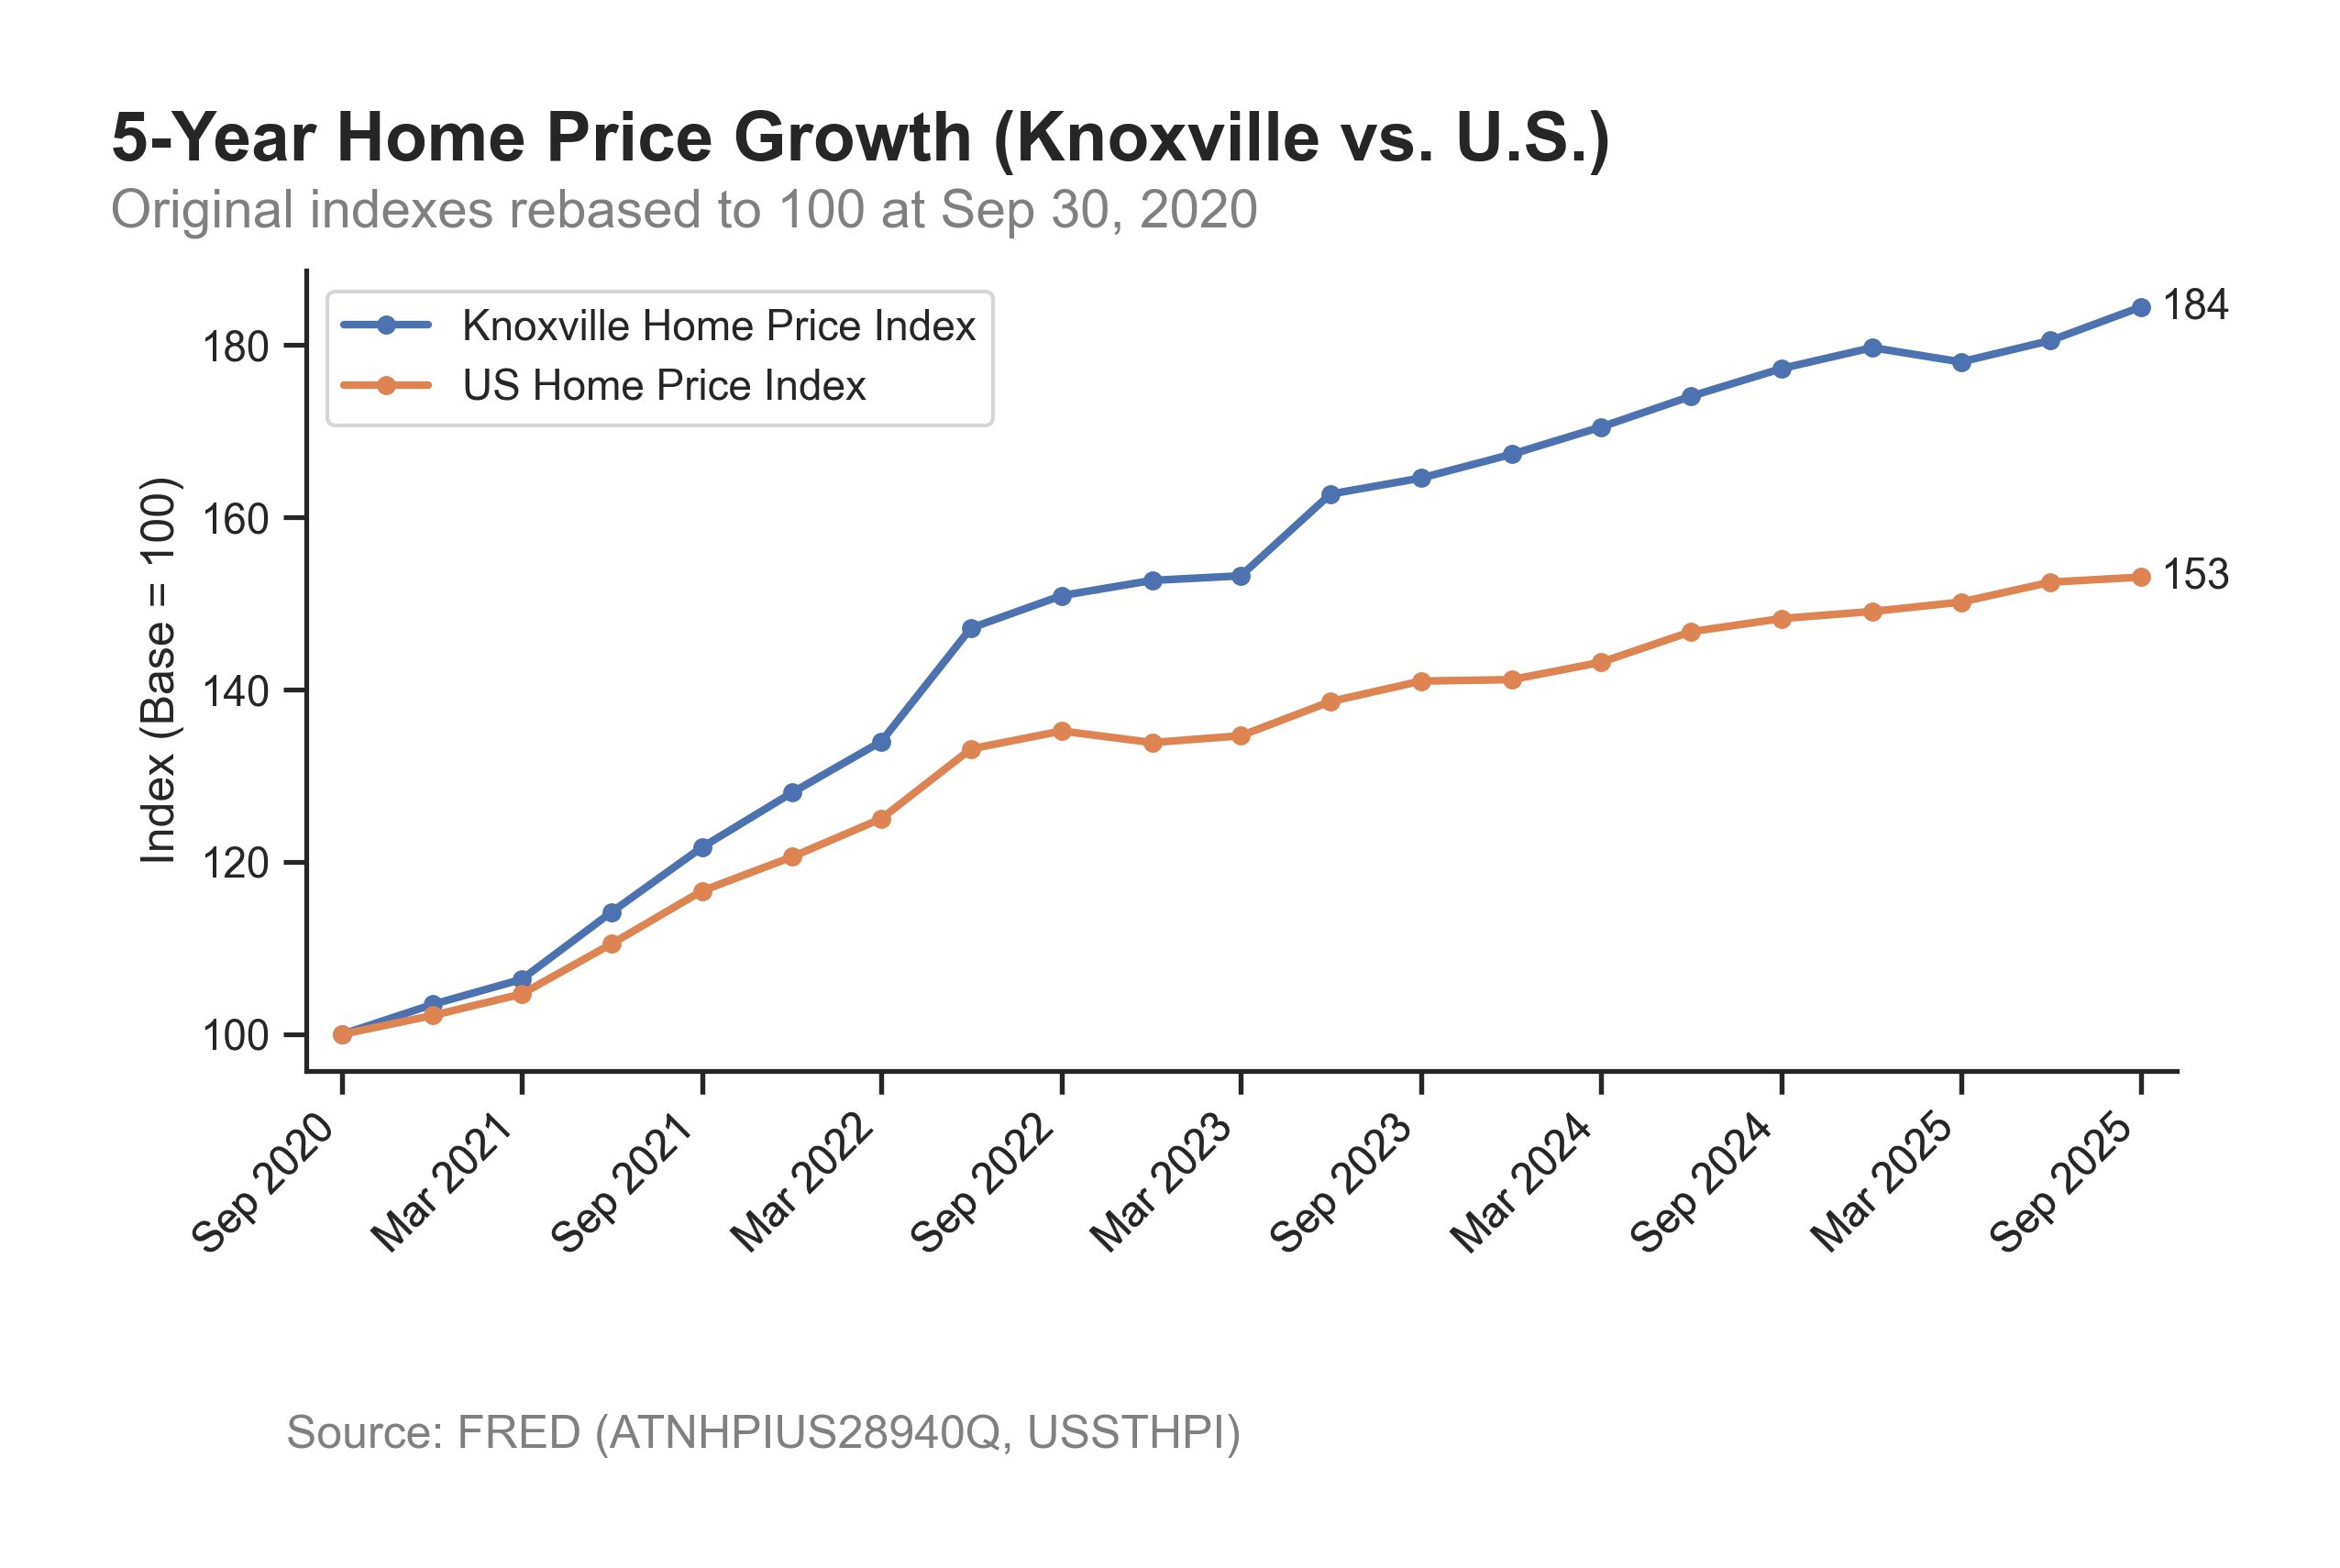

In [ ]:
from IPython.display import Image, display

display(Image(filename="plots/housing-price-index-rebased.png"))

# <img src="plots/housing-price-index-rebased.png?v=3" />

In [ ]:
from IPython.display import HTML, display

html = """

<div class="panel-container">
  <div class="panel">
    <div class="panel-title">
      Income required for a home loan downpayment<sup>5</sup>
    </div>
    <div class="panel-date">(2025)</div>
    <div class="panel-group-container">
      <div class="panel-group">
        <div class="panel-subtitle panel-group-subtitle">Knoxville, TN</div>
        <div class="panel-value panel-group-value">$85,892</div>
        <div>(+0.8% Y/Y)</div>
      </div>
    </div>
  </div>
  <div class="panel">
    <div class="panel-title">Monthly cost of homeownership<sup>5</sup></div>
    <div class="panel-date">(2025)</div>
    <div class="panel-group-container">
      <div class="panel-group">
        <div class="panel-subtitle panel-group-subtitle">Knoxville, TN</div>
        <div class="panel-value panel-group-value">$2,581</div>
        <div>(+0.8% Y/Y)</div>
      </div>
    </div>
  </div>
</div>
"""

display(HTML(html))

The homeowner income required for a downpayment on a home loan rose significantly in 2022 and 2023, but flattened and even began to trend downward in Q4 2025. The recent trend is higher home prices with slightly higher monthly payments for new home owners. Income requirements for new home loans remained unchanged over the year.

## Summary

Overall, the recent trend in Knoxville includes growth in total employment and a lower unemployment rate. Hourly wages in Knoxville remained below the national average along with annual cost of living. Moreover, growth in discretionary spending in Tennessee. This imbalance suggests tighter household budgets for Knoxville residents. At the same time, there is evidence that wage growth in Tennessee and surrounding regions is outpacing national average wage growth, indicating improving income dynamics despite current constraints. Rising employment and relative incomes serve as a tailwind for housing demand.


## Footnotes

<sup>2</sup> Knoxville, TN, Area Economic Summary (https://www.bls.gov/regions/southeast/summary/blssummary_knoxville.pdf). Total employment refers to total nonfarm employment.

<sup>3</sup> Median annual income (https://www.justice.gov/ust/eo/bapcpa/20240401/bci_data/median_income_table.htm)

<sup>4</sup>

<sup>5</sup> Zillow housing data (https://www.zillow.com/research/data/?msockid=1e635bc70b80661b06994d010a196723). Monthly cost of homeownership includes the mortgage payment, homeowner's insurance, property taxes and maintenance costs. Income required for a home loan downpayment is the average homeowner income required for downpayment on a home loan


In [ ]:
# # Multiple Regression

# # Correlation Matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'housing_df' is the DataFrame containing the data
# # Plotting the correlation matrix
# print(df.head())
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
# plot_data = df.loc["2020":, ["knox_pop", "us_pop"]].copy()


# fig, ax = plt.subplots(figsize=(8, 4))

# # Colors for positive/negative
# colors = ["skyblue" if v >= 0 else "pink" for v in pct_chg]

# # Convert dates to string labels
# labels = pct_chg.index.strftime("%Y-%m-%d")

# # Use positions instead of datetime index
# positions = range(len(pct_chg))

# # Single bar plot
# ax.bar(
#     positions,
#     pct_chg,
#     width=0.8,
#     color=colors,
#     edgecolor="gray",
#     alpha=0.6,
#     linewidth=1.5,
# )

# # set tick labels to full date strings
# ax.set_xticks(positions)
# ax.set_xticklabels(labels, rotation=0, ha="center")

# # Remove y-axis ticks/labels
# ax.set_ylabel("")
# ax.tick_params(axis="y", which="both", left=False, labelleft=False)

# ax.set_title(
#     "Knoxville Population Growth (YoY)",
#     fontsize=18,
#     fontweight="bold",
#     loc="left",
#     pad=14,
# )
# ax.set_xlabel("")

# # Remove spines
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)

# # Annotate each bar using positions
# for x, y in zip(positions, pct_chg):
#     ax.annotate(
#         f"{y:.1%}",
#         xy=(x, y),
#         xytext=(0, 5),
#         textcoords="offset points",
#         ha="center",
#         fontsize=12,
#     )

# plt.show()

In [ ]:
# import pandas as pd

# # Create a copy of the raw data
# df = raw.copy()

# # Reformat column names
# df.columns = [c.replace(".", "_") for c in df.columns]
# df.rename(
#     columns={"DT": "Date", "variable": "Variable", "value": "Value"}, inplace=True
# )

In [ ]:
# Convert date column to datetime
# df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")
# df["Date"] = df["Date"].dt.date

In [ ]:
# # Drop unnecessary columns
# df.drop("column0", axis=1, inplace=True)

# # Does every Geography_Name have exactly one CBSA_Code and vice versa?
# if (df.groupby("Geography_Name")["CBSA_Code"].nunique() == 1).all() and (
#     df.groupby("CBSA_Code")["Geography_Name"].nunique() == 1
# ).all():
#     print(
#         "True. Every Geography_Name has exactly one CBSA_Code and vice versa so there is a 1-to-1 relationship between the variables and it's safe to drop the CBSA_Code column."
#     )
#     # Drop the CBSA_Code column
#     df.drop("CBSA_Code", axis=1, inplace=True)
# else:
#     print("False. There is not a 1-to-1 mapping between Geography_Name and CBSA_Code.")

In [ ]:
# Find missing values
# df.isna().sum()

In [ ]:
# cremi = df[df["Variable"] == "CREMI"].copy()
# cremi.drop("Variable", axis=1, inplace=True)
# cremi.rename(columns={"Value": "CREMI"}, inplace=True)

In [ ]:
# Show unique asset types
# print(cremi["Asset_Type"].value_counts().map("{:,}".format))

In [ ]:
# Show unique geographic regions
# print(f"{len(cremi["Geography_Name"].unique())} unique regions")

In [ ]:
# cremi["Start_Date"] = cremi.groupby(["Geography_Name", "Asset_Type"])["Date"].transform(
#     "min"
# )
# cremi["End_Date"] = cremi.groupby(["Geography_Name", "Asset_Type"])["Date"].transform(
#     "max"
# )

# cremi[
#     ["Geography_Name", "Asset_Type", "Start_Date", "End_Date"]
# ].drop_duplicates().reset_index(drop=True)

In [ ]:
# import pandas as pd
# from datetime import date
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle


# mf = (
#     cremi[cremi["Asset_Type"] == "Multifamily"].copy().drop("Asset_Type", axis=1)
# )  # Extract the State
# mf["State"] = mf["Geography_Name"].str.split(" - ").str[1]
# mf["State"].nunique()
# by_state = mf.groupby(["State", "Date"]).agg({"CREMI": "mean"}).reset_index()

# by_state["CREMI_MA(1Y)"] = (
#     by_state.groupby("State")["CREMI"]
#     .rolling(window=4, min_periods=4)
#     .mean()
#     .reset_index(level=0, drop=True)
# )

# # Get values for most recent date
# # by_state = by_state.sort_values('Date').groupby('State').tail(4)
# by_state = by_state[by_state["Date"] >= date(2024, 9, 30)]


# # Step 1: Flag positive momentum
# by_state["+ Momentum"] = (by_state["CREMI"] > by_state["CREMI_MA(1Y)"]) & (
#     by_state["CREMI"] > 0
# )

# # Step 2: Keep only rows with positive momentum
# positive = by_state[by_state["+ Momentum"]].copy()

# # Only keep top 5 states per date (or filter as needed)
# # top5 = (
# #     positive.groupby('Date')
# #     .apply(lambda x: x.nlargest(5, 'CREMI'))  # x still contains 'Date', 'CREMI', etc.
# #     .reset_index(drop=True)
# # )

# positive["Rank"] = positive.groupby("Date")["CREMI"].rank(
#     method="first", ascending=False
# )
# top5 = positive[positive["Rank"] <= 5].copy()


# # Plot using seaborn
# import matplotlib.pyplot as plt
# import numpy as np

# import matplotlib.pyplot as plt
# import numpy as np

# # Unique states and assign colors
# states = top5["State"].unique()
# cmap = plt.get_cmap("tab10")
# colors = [cmap(i) for i in range(cmap.N)]  # cmap.N = 10
# state_to_color = {state: colors[i % len(colors)] for i, state in enumerate(states)}

# # Unique dates
# dates = sorted(top5["Date"].unique())

# # Bar width
# width = 0.15
# fig, ax = plt.subplots(figsize=(12, 6))

# # Plot bars
# for i, d in enumerate(dates):
#     date_data = top5[top5["Date"] == d].sort_values("CREMI")  # Sort ascending

#     n = len(date_data)
#     x = i + np.arange(n) * width  # positions for bars in this group
#     for j, row in enumerate(date_data.itertuples()):
#         ax.bar(x[j], row.CREMI, width=width, color=state_to_color[row.State])
#         ax.text(
#             x[j],
#             row.CREMI + 0.01,
#             f"{row.CREMI:.2f}",
#             ha="center",
#             va="bottom",
#             fontsize=9,
#         )

# # X-ticks in the center of each group
# group_centers = [
#     i + (len(top5[top5["Date"] == d]) - 1) * width / 2 for i, d in enumerate(dates)
# ]
# # Add value label above the bar

# ax.set_xticks(group_centers)
# ax.set_xticklabels(dates, rotation=45)
# ax.set_ylabel("CREMI")
# ax.set_title("Top CREMI States by Date (+ Momentum)")

# # Create legend with correct colors
# handles = [Rectangle((0, 0), 1, 1, color=state_to_color[state]) for state in states]
# ax.legend(handles, states, title="State", loc="upper left", ncol=len(states))

# plt.tight_layout()
# plt.show()


# # # Step 3: Rank states by CREMI for each date (highest CREMI = rank 1)
# # positive['Rank'] = positive.groupby('Date')['CREMI'].rank(method='first', ascending=False)

# # # Step 4: Keep top 5 states per date
# # top5 = positive[positive['Rank'] <= 5]

# # print(top5.sort_values(["Date"]))
# # # Step 5: Pivot so each state is a column
# # pivoted = top5.pivot(index='Date', columns='State', values='CREMI')


# # subset = by_state[
# #     (by_state['Date'] > date(2024, 1, 1)) &
# #     (by_state['State'].isin(['AZ', 'CA', 'TN']))
# # ]

# # # print(subset.columns.tolist())

In [ ]:
# out = con.execute(
#     """
#     SELECT Geography_Name, Asset_Type, Date, Value
#     FROM df
#     WHERE Asset_Type = 'Multifamily'
#     """
# ).fetchdf()
# print(out)